<a href="https://colab.research.google.com/github/hyunwjang/deep/blob/main/_8_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">

<sub>출처: https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [ ]:
import numpy as np

In [ ]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

sucessive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  sucessive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(sucessive_outputs, axis = 0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen = max_len)
input_test = sequence.pad_sequences(input_test, maxlen = max_len)
print(input_train.shape)
print(input_test.shape)


25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 66s 422ms/step - loss: 0.3704 - acc: 0.8497 - val_loss: 0.5689 - val_acc: 0.7744
Epoch 2/10
157/157 [==============================] - 65s 411ms/step - loss: 0.2801 - acc: 0.8910 - val_loss: 0.3508 - val_acc: 0.8636
Epoch 3/10
157/157 [==============================] - 72s 457ms/step - loss: 0.2332 - acc: 0.9110 - val_loss: 0.4083 - val_acc: 0.8364
Epoch 4/10
157/157 [==============================] - 74s 469ms/step - loss: 0.1993 - acc: 0.9261 - val_loss: 0.3597 - val_acc: 0.8580
Epoch 5/10
157/157 [==============================] - 74s 469ms/step - loss: 0.1611 - acc: 0.9409 - val_loss: 0.3745 - val_acc: 0.8650
Epoch 6/10
157/157 [==============================] - 69s 438ms/step - loss: 0.1317 - acc: 0.9539 - val_loss: 0.4117 - val_acc: 0.8412
Epoch 7/10
157/157 [==============================] - 65s 411ms/step - loss: 0.1119 - acc: 0.9599 - val_loss: 0.4369 - val_acc: 0.8366
Epoch 8/10
157/157 [==============================] - 6

### 시각화

In [ ]:
import matplotlib.pyplot as plt

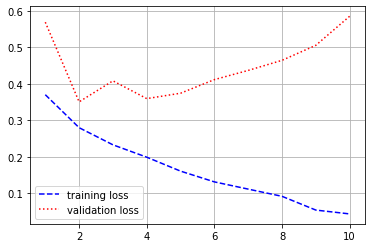

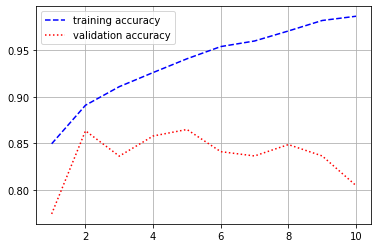

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 29s 37ms/step - loss: 0.6089 - acc: 0.8054


[0.6089110374450684, 0.8053600192070007]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

# LSTM과 GRU 레이어

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



## LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 예제로 보는 순환 신경망: Reuters 

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
num_words = 10000

(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words = num_words)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

2110848/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 500

In [ ]:
pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)

print(len(pad_x_train[0]))

500


In [ ]:
len(pad_x_train)

8982

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense, Embedding

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm_4 (LSTM)               (None, None, 64)          33024     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 46)                1518      
                                                                 
Total params: 686,958
Trainable params: 686,958
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(pad_x_train, y_train,
                    batch_size=32, epochs = 20,
                    validation_split =0.2)

Epoch 1/20
225/225 [==============================] - 17s 39ms/step - loss: 2.5523 - acc: 0.3521 - val_loss: 2.4121 - val_acc: 0.3450
Epoch 2/20
225/225 [==============================] - 8s 35ms/step - loss: 2.3962 - acc: 0.3598 - val_loss: 2.2227 - val_acc: 0.4708
Epoch 3/20
225/225 [==============================] - 8s 35ms/step - loss: 2.0524 - acc: 0.4842 - val_loss: 1.9386 - val_acc: 0.4919
Epoch 4/20
225/225 [==============================] - 8s 35ms/step - loss: 1.8229 - acc: 0.5372 - val_loss: 1.7502 - val_acc: 0.5598
Epoch 5/20
225/225 [==============================] - 8s 35ms/step - loss: 1.6706 - acc: 0.5705 - val_loss: 1.7150 - val_acc: 0.5648
Epoch 6/20
225/225 [==============================] - 8s 35ms/step - loss: 1.5949 - acc: 0.5932 - val_loss: 1.6627 - val_acc: 0.5748
Epoch 7/20
225/225 [==============================] - 8s 35ms/step - loss: 1.5661 - acc: 0.5955 - val_loss: 1.6831 - val_acc: 0.5721
Epoch 8/20
225/225 [==============================] - 8s 37ms/step -

### 시각화

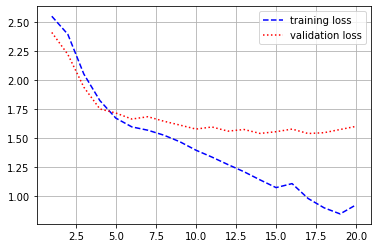

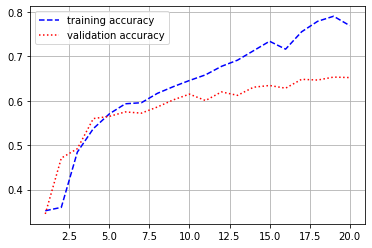

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가


In [ ]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 17ms/step - loss: 1.6613 - acc: 0.6362


[1.6613171100616455, 0.6362422108650208]

## IMDB 데이터셋 with LSTM

### 데이터 로드

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words = 10000
max_len = 500
batch_size = 32

(pad_x_train, y_train), (pad_x_test, y_test) = imdb.load_data(num_words = num_words)
print(len(pad_x_train))
print(len(pad_x_test))

pad_x_train = sequence.pad_sequences(pad_x_train, maxlen = max_len)
pad_x_test = sequence.pad_sequences(pad_x_test, maxlen = max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)


25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [ ]:
model = Sequential()

model.add(Embedding(num_words , 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer ='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(pad_x_train, y_test
                    ,epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 4s 24ms/step - loss: 0.2190 - acc: 0.9178 - val_loss: 1.4552 - val_acc: 0.5050
Epoch 2/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1835 - acc: 0.9341 - val_loss: 1.6705 - val_acc: 0.5118
Epoch 3/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1509 - acc: 0.9463 - val_loss: 1.7691 - val_acc: 0.5098
Epoch 4/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1261 - acc: 0.9557 - val_loss: 1.9363 - val_acc: 0.5016
Epoch 5/10
157/157 [==============================] - 4s 27ms/step - loss: 0.1020 - acc: 0.9651 - val_loss: 2.1514 - val_acc: 0.4994
Epoch 6/10
157/157 [==============================] - 3s 22ms/step - loss: 0.0859 - acc: 0.9739 - val_loss: 2.2436 - val_acc: 0.5062
Epoch 7/10
157/157 [==============================] - 3s 22ms/step - loss: 0.0688 - acc: 0.9787 - val_loss: 2.2436 - val_acc: 0.5036
Epoch 8/10
157/157 [==============================] - 4s 24ms/step - 

### 시각화

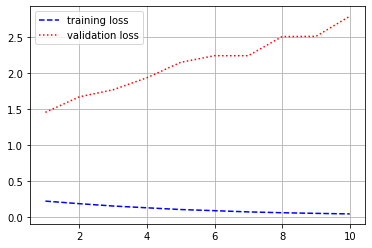

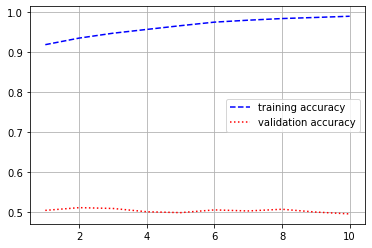

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 7s 9ms/step - loss: 2.7644 - acc: 0.5008


[2.764370918273926, 0.5008400082588196]

# Cosine 함수를 이용한 순환 신경망

In [ ]:
import numpy as np

In [ ]:
np.random.seed(111)

time = np.arange(30*12+1)
month_time = (time %30) / 30
time_series = 20 *np.where(month_time < 0.5,
                           np.cos(2 * np.pi * month_time),
                           np.cos(2 * np.pi * month_time) +np.random.random(361))

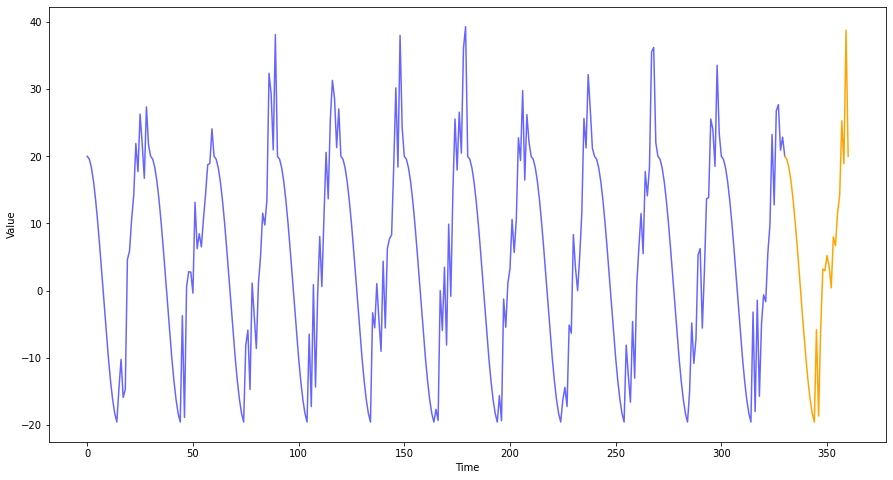

In [ ]:
plt.figure(figsize =( 15,8))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30*11+1),
         time_series[:30*11+1],
         color = 'blue',alpha = 0.6, label = 'Train Data')
plt.plot(np.arange(30*11, 30*12+1),
         time_series[30*11:],
         color = 'orange',label = 'Test Data')
plt.show()

### 데이터 전처리

In [ ]:
def make_data(time_series, n):
  x_train_full, y_train_full =list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i+n)]
    if (i+n)< len(time_series):
      x_train_full.append(x)
      y_train_full.append(time_series[i+n])
    else:
      break
  x_train_full, y_train_full = np.array(x_train_full), np.array(y_train_full)

  return x_train_full, y_train_full


In [ ]:
n = 10
x_train_full, y_train_full = make_data(time_series,  n)


In [ ]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351,)


In [ ]:
x_train_full = x_train_full.reshape(-1, n,1)
y_train_full = y_train_full.reshape(-1,1)

In [ ]:
print(x_train_full.shape)
print(y_train_full.shape)

(351, 10, 1)
(351, 1)


## 테스트 데이터셋 생성

In [ ]:
x_train = x_train_full[:30*11]
y_train = y_train_full[:30*11]

x_test = x_train_full[30*11:]
y_test = y_train_full[30*11:]

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(330, 10, 1) (330, 1)
(21, 10, 1) (21, 1)


## 데이터 확인

In [ ]:
sample_series = np.arange(100)
a,b  = make_data(sample_series, 10)
print(a[0])
print(b[0])

[0 1 2 3 4 5 6 7 8 9]
10


## 모델 구성

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
def build_model(n):
  model = Sequential()

  model.add(SimpleRNN(units= 32, activation = 'tanh', input_shape = (n ,1)))
  model.add(Dense(1))

  model.compile(optimizer = 'adam',
                loss = 'mse')
  return model

In [ ]:
model = build_model(10)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [ ]:
model.fit(x_train, y_train, epochs = 100, batch_size = 12)

Epoch 1/100
28/28 [==============================] - 1s 9ms/step - loss: 207.2252
Epoch 2/100
28/28 [==============================] - 0s 9ms/step - loss: 170.0390
Epoch 3/100
28/28 [==============================] - 0s 8ms/step - loss: 148.3321
Epoch 4/100
28/28 [==============================] - 0s 8ms/step - loss: 133.1496
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 121.2244
Epoch 6/100
28/28 [==============================] - 0s 9ms/step - loss: 110.7743
Epoch 7/100
28/28 [==============================] - 0s 7ms/step - loss: 100.3980
Epoch 8/100
28/28 [==============================] - 0s 8ms/step - loss: 91.1663
Epoch 9/100
28/28 [==============================] - 0s 8ms/step - loss: 84.5100
Epoch 10/100
28/28 [==============================] - 0s 9ms/step - loss: 78.6607
Epoch 11/100
28/28 [==============================] - 0s 8ms/step - loss: 73.5268
Epoch 12/100
28/28 [==============================] - 0s 9ms/step - loss: 68.8051
Epoch 13/100
28/28

## 예측값 그려보기

1/1 [==============================] - 0s 31ms/step


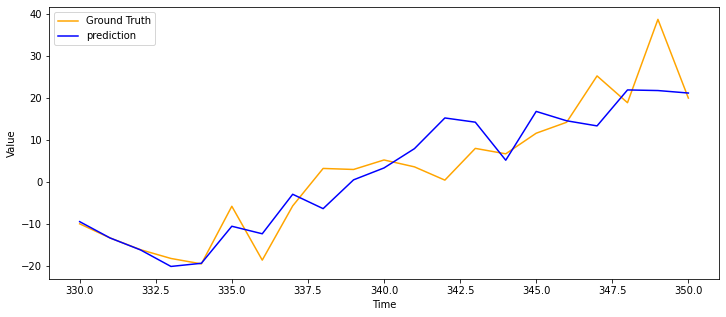

In [ ]:
prediction = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(prediction))

plt.figure(figsize = (12,5))
plt.xlabel('Time')
plt.ylabel('Value')

plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(), color = 'blue', label = 'prediction')
plt.legend()
plt.show()

## 모델 재구성 (2)
- LSTM 사용

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
def build_model2(n):
  model = Sequential()

  model.add(LSTM(units= 64, return_sequences = True, input_shape = (n ,1)))
  model.add(LSTM(32))
  model.add(Dense(1))

  model.compile(optimizer = 'adam',
                loss = 'mse')
  return model

In [ ]:
model_2 = build_model2(10)
model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10, 64)            16896     
                                                                 
 lstm_10 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [ ]:
model_2.fit(x_train, y_train, epochs = 100, batch_size = 12)

Epoch 1/100
28/28 [==============================] - 3s 5ms/step - loss: 215.5778
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 162.2090
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 121.5147
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 97.3052
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 81.2838
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 68.5685
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 60.3731
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 53.8112
Epoch 9/100
28/28 [==============================] - 0s 5ms/step - loss: 49.6802
Epoch 10/100
28/28 [==============================] - 0s 5ms/step - loss: 45.2158
Epoch 11/100
28/28 [==============================] - 0s 6ms/step - loss: 41.4491
Epoch 12/100
28/28 [==============================] - 0s 5ms/step - loss: 38.5743
Epoch 13/100
28/28 [==

1/1 [==============================] - 1s 596ms/step


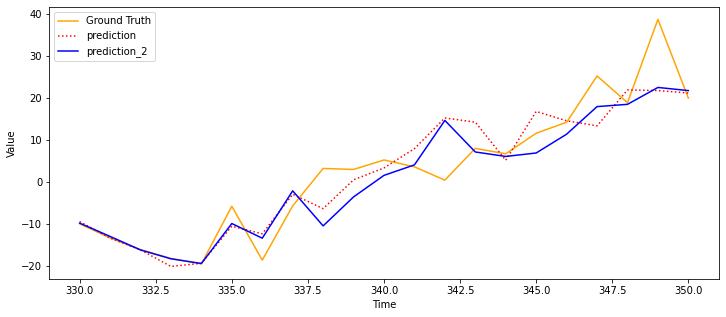

In [ ]:
prediction_2 = model_2.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(prediction_2))

plt.figure(figsize = (12,5))
plt.xlabel('Time')
plt.ylabel('Value')

plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')
plt.plot(pred_range, prediction.flatten(),  'r:', label = 'prediction')
plt.plot(pred_range, prediction_2.flatten(), color = 'blue', label = 'prediction_2')
plt.legend()
plt.show()

## 모델 재구성(3)
- GRU 사용
  - LSTM 보다 더 쉬운 구조

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
def build_model3(n):
  model = Sequential()

  model.add(GRU(units= 30, return_sequences = True, input_shape = (n ,1)))
  model.add(GRU(32))
  model.add(Dense(1))

  model.compile(optimizer = 'adam',
                loss = 'mse')
  return model

model_3  = build_model3(10)
model_3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 30)            2970      
                                                                 
 gru_1 (GRU)                 (None, 32)                6144      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,147
Trainable params: 9,147
Non-trainable params: 0
_________________________________________________________________


## 모델 재학습 및 예측값 그려보기

In [ ]:
model_3.fit(x_train,y_train , epochs  = 100, batch_size = 12)

Epoch 1/100
28/28 [==============================] - 3s 5ms/step - loss: 223.2926
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 164.2399
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 126.1218
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 101.8403
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 86.2737
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 76.0572
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 67.9937
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 62.1299
Epoch 9/100
28/28 [==============================] - 0s 5ms/step - loss: 56.7664
Epoch 10/100
28/28 [==============================] - 0s 5ms/step - loss: 52.4469
Epoch 11/100
28/28 [==============================] - 0s 5ms/step - loss: 47.9594
Epoch 12/100
28/28 [==============================] - 0s 5ms/step - loss: 44.4137
Epoch 13/100
28/28 [=

1/1 [==============================] - 0s 18ms/step


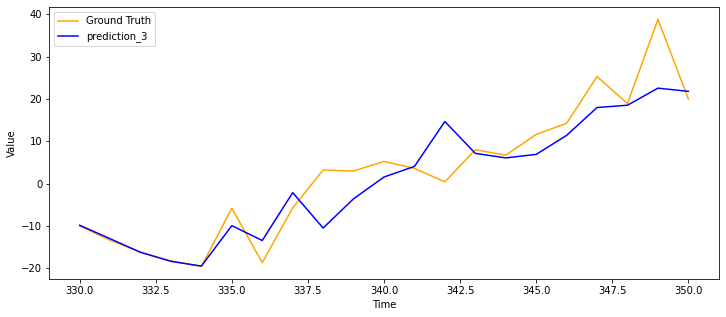

In [ ]:
prediction_3 = model_2.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(prediction_3))

plt.figure(figsize = (12,5))
plt.xlabel('Time')
plt.ylabel('Value')

plt.plot(pred_range, y_test.flatten(), color = 'orange', label = 'Ground Truth')

plt.plot(pred_range, prediction_3.flatten(), color = 'blue', label = 'prediction_3')
plt.legend()
plt.show()

# Conv1D 

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

## Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

## MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

## GlovalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터셋

### 데이터 로드 및 전처리

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing .sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [ ]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_words)
print(len(input_train))
print(len(input_test))

25000
25000


In [ ]:
pad_x_train = pad_sequences(input_train, maxlen = max_len)
pad_x_test = pad_sequences(input_test, maxlen = max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)


(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
def build_model():
  model = Sequential()

  model.add(Embedding(input_dim = num_words, output_dim =32,
                      input_length =max_len))
  model.add(Conv1D(32, 7, activation = 'relu'))
  model.add(MaxPooling1D(7))
  model.add(Conv1D(32, 7, activation = 'relu'))
  model.add(MaxPooling1D(5))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(optimizer = RMSprop(learning_rate = 1e-4),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model

In [ ]:
model = build_model()

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 32)           320000    
                                                                 
 conv1d_4 (Conv1D)           (None, 494, 32)           7200      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 70, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 64, 32)            7200      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 12, 32)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)             


### 모델 학습

In [ ]:
history = model.fit(pad_x_train, y_train, epochs = 20, batch_size =128, validation_split = 0.2)

Epoch 1/20
157/157 [==============================] - 6s 9ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6921 - val_accuracy: 0.5248
Epoch 2/20
157/157 [==============================] - 1s 7ms/step - loss: 0.6909 - accuracy: 0.5870 - val_loss: 0.6909 - val_accuracy: 0.5918
Epoch 3/20
157/157 [==============================] - 1s 7ms/step - loss: 0.6880 - accuracy: 0.6542 - val_loss: 0.6880 - val_accuracy: 0.6464
Epoch 4/20
157/157 [==============================] - 1s 7ms/step - loss: 0.6821 - accuracy: 0.6779 - val_loss: 0.6793 - val_accuracy: 0.6244
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 0.6670 - accuracy: 0.7340 - val_loss: 0.6551 - val_accuracy: 0.7292
Epoch 6/20
157/157 [==============================] - 1s 7ms/step - loss: 0.6271 - accuracy: 0.7660 - val_loss: 0.5982 - val_accuracy: 0.7708
Epoch 7/20
157/157 [==============================] - 1s 7ms/step - loss: 0.5551 - accuracy: 0.7990 - val_loss: 0.5174 - val_accuracy: 0.7950
Epoch 

### 시각화

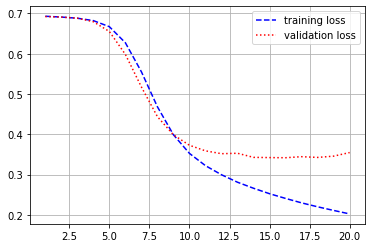

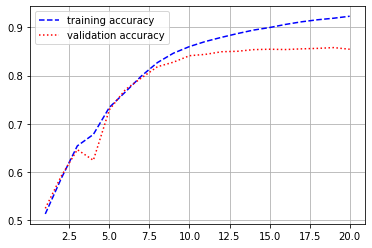

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, accuracy, 'b--', label = 'training accuracy')
plt.plot(epochs, val_accuracy, 'r:', label = 'validation accuracy')
plt.grid()
plt.legend()

plt.show()

- 과적합이 일어났지만, 다른 옵티마이저 사용, 규제화를 걸어보는 등 다양하게 시도해볼 수 있음